# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

url = base_url + "appid=" + api_key + "&units=" + units

In [4]:
city_name = "London"
requests.get("http://api.openweathermap.org/data/2.5/weather?q=London&APPID=" + api_key)
#http://api.openweathermap.org/data/2.5/weather?q=London?

<Response [200]>

In [5]:
#append lists to the api call
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#call count
record = 1

#Beginning Data Retrieval
print(f"Beginning Data Retrieval")

# city_name = "London"
# response = requests.get(f"{url}&q={city_name}").json()
test_city = cities[0:600]

#print(response)


#loop through list of cities 
for city_name in test_city:
    print(city_name)
    try:
        response = requests.get(f"{url}&q={city_name}").json()
        city.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        city_record = response["name"]
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {record} | {city_record}")
        #print(f"{url}&q={city}")
        
        #count increase
        record= record + 1
        
        #wait to limit api rate 
        time.sleep(2.0)
        
    except:
        print("City not found... Skip")
    continue
pprint(city)        

Beginning Data Retrieval
busselton
Processing Record 1 | Busselton
kruisfontein
Processing Record 2 | Kruisfontein
stephenville
Processing Record 3 | Stephenville
labutta
City not found... Skip
kapaa
Processing Record 4 | Kapaa
taltal
Processing Record 5 | Taltal
port alfred
Processing Record 6 | Port Alfred
morristown
Processing Record 7 | Morristown
lavrentiya
Processing Record 8 | Lavrentiya
mount gambier
Processing Record 9 | Mount Gambier
bredasdorp
Processing Record 10 | Bredasdorp
punta arenas
Processing Record 11 | Punta Arenas
taolanaro
City not found... Skip
albany
Processing Record 12 | Albany
jalu
Processing Record 13 | Jalu
umm kaddadah
Processing Record 14 | Umm Kaddadah
barrow
Processing Record 15 | Barrow
makakilo city
Processing Record 16 | Makakilo City
tuatapere
Processing Record 17 | Tuatapere
okha
Processing Record 18 | Okha
vaini
Processing Record 19 | Vaini
kavieng
Processing Record 20 | Kavieng
hilo
Processing Record 21 | Hilo
ribeira grande
Processing Record 22

Processing Record 174 | Mizdah
barela
Processing Record 175 | Barela
beyneu
Processing Record 176 | Beyneu
nguiu
City not found... Skip
mugumu
Processing Record 177 | Mugumu
plettenberg bay
Processing Record 178 | Plettenberg Bay
chuy
Processing Record 179 | Chuy
berlevag
Processing Record 180 | Berlevag
cherskiy
Processing Record 181 | Cherskiy
isla mujeres
Processing Record 182 | Isla Mujeres
zhezkazgan
Processing Record 183 | Zhezkazgan
sisimiut
Processing Record 184 | Sisimiut
haines junction
Processing Record 185 | Haines Junction
vylgort
City not found... Skip
lodja
Processing Record 186 | Lodja
yar-sale
Processing Record 187 | Yar-Sale
tornio
Processing Record 188 | Tornio
norman wells
Processing Record 189 | Norman Wells
isangel
Processing Record 190 | Isangel
athens
Processing Record 191 | Athens
nouadhibou
Processing Record 192 | Nouadhibou
singaraja
Processing Record 193 | Singaraja
liepaja
Processing Record 194 | Liepaja
nhulunbuy
Processing Record 195 | Nhulunbuy
apt
Proce

Processing Record 352 | Ouahigouya
suozhen
Processing Record 353 | Suozhen
dingle
Processing Record 354 | Dingle
bathsheba
Processing Record 355 | Bathsheba
davila
Processing Record 356 | Davila
grand river south east
City not found... Skip
luderitz
Processing Record 357 | Luderitz
santa maria del oro
Processing Record 358 | Santa Maria del Oro
yatou
Processing Record 359 | Yatou
narsaq
Processing Record 360 | Narsaq
issoire
Processing Record 361 | Issoire
khorinsk
Processing Record 362 | Khorinsk
rafaela
Processing Record 363 | Rafaela
saint-joseph
Processing Record 364 | Saint-Joseph
marshalltown
Processing Record 365 | Marshalltown
myitkyina
Processing Record 366 | Myitkyina
kungurtug
Processing Record 367 | Kungurtug
isla vista
Processing Record 368 | Isla Vista
lapua
Processing Record 369 | Lapua
karratha
Processing Record 370 | Karratha
kijang
Processing Record 371 | Kijang
gurskoye
City not found... Skip
ambon
Processing Record 372 | Ambon
cayenne
Processing Record 373 | Cayenne

hit
Processing Record 533 | Hit
samarai
Processing Record 534 | Samarai
tessalit
Processing Record 535 | Tessalit
belyy yar
Processing Record 536 | Belyy Yar
['Busselton',
 'Kruisfontein',
 'Stephenville',
 'Kapaa',
 'Taltal',
 'Port Alfred',
 'Morristown',
 'Lavrentiya',
 'Mount Gambier',
 'Bredasdorp',
 'Punta Arenas',
 'Albany',
 'Jalu',
 'Umm Kaddadah',
 'Barrow',
 'Makakilo City',
 'Tuatapere',
 'Okha',
 'Vaini',
 'Kavieng',
 'Hilo',
 'Ribeira Grande',
 'Hermanus',
 'Upernavik',
 'Yellowknife',
 'Santa Cruz',
 'Hobart',
 'Sorong',
 'San Policarpo',
 'Arraial do Cabo',
 'Niquero',
 'Egvekinot',
 'Bluff',
 'Tuktoyaktuk',
 'Xiaoweizhai',
 'Sao Joao da Barra',
 'Beringovskiy',
 'Laurel',
 'Jamestown',
 'Ushuaia',
 'College',
 'Saint-Augustin',
 'Purranque',
 'Manado',
 'Ketchikan',
 'Hamilton',
 'Nago',
 'Avarua',
 'Butaritari',
 'Presidente Medici',
 'Mataura',
 'Lompoc',
 'Souillac',
 'Saint-Francois',
 'Barra da Estiva',
 'Morondava',
 'Araouane',
 'Nome',
 'Ossora',
 'Rio Gallegos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#creating dataframe from call
df = {
    "City": city,
    "Cloudiness": cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitude" : lat,
    "Longitude" : lng,
    "Maximum Temperature" : max_temp,
    "Wind Speed" : wind_speed}

#create df from dict
weatherPyDf = pd.DataFrame(df)
weatherPyDf.count()

City                   536
Cloudiness             536
Country                536
Date                   536
Humidity               536
Latitude               536
Longitude              536
Maximum Temperature    536
Wind Speed             536
dtype: int64

In [7]:
weatherPyDf.to_csv('WeatherPy.csv', index=False, header=False)
weatherPyDf.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Busselton,0,AU,1547322957,100,-33.64,115.35,63.43,18.79
1,Kruisfontein,0,ZA,1547323065,90,-34.00,24.73,63.38,7.49
2,Stephenville,90,US,1547321700,60,32.22,-98.20,50.54,18.34
3,Kapaa,75,US,1547321700,62,22.08,-159.32,77.00,3.36
4,Taltal,0,CL,1547323072,61,-25.41,-70.49,68.51,4.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

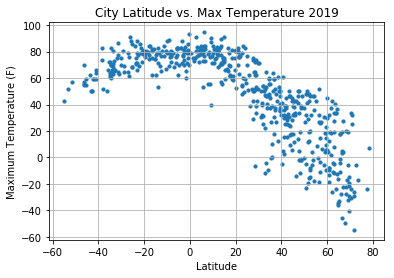

In [8]:
#Temperature scatter plot
plt.scatter(weatherPyDf["Latitude"], weatherPyDf["Maximum Temperature"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature 2019")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Temperature_Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

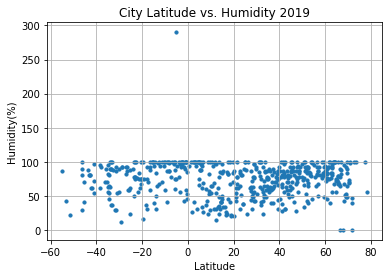

In [14]:
#Humidity scatter plot
plt.scatter(weatherPyDf["Latitude"], weatherPyDf["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity 2019")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Humidity_Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

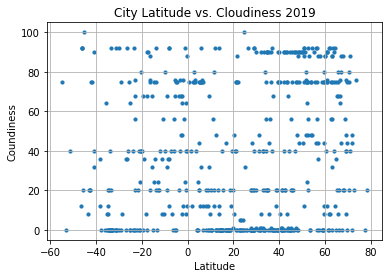

In [12]:
#Humidity scatter plot
plt.scatter(weatherPyDf["Latitude"], weatherPyDf["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness 2019")
plt.ylabel("Coundiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Cloudiness_Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

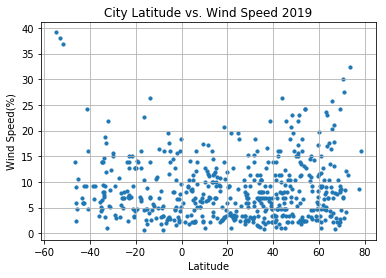

In [13]:
#Humidity scatter plot
plt.scatter(weatherPyDf["Latitude"], weatherPyDf["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed 2019")
plt.ylabel("Wind Speed(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Wind_Speed_Plot.png")
plt.show()